In [5]:
library(plsdepot)

In [10]:
chi = read.table('~/Desktop/chi.csv', sep = ",", header=TRUE, row.names = 1)
ahba = read.table('~/Desktop/AHBAx.csv', sep = ",", header=TRUE, row.names = 1)

In [12]:
#  Y dependent - response variable , 
#  X independent - set of predictor variables

help(plsreg1)

plsreg1 {plsdepot},R Documentation
predictors,A numeric matrix or data frame with the predictor variables (which may contain missing data).
response,A numeric vector for the reponse variable. No missing data allowed.
comps,The number of extracted PLS components (2 by default).
crosval,Logical indicating whether cross-validation should be performed (TRUE by default). No cross-validation is done if there is missing data or if there are less than 10 observations.
x.scores,PLS components (also known as T-components)
x.loads,loadings of the predictor variables
y.scores,scores of the response variable (also known as U-components)
y.loads,loadings of the response variable
cor.xyt,Correlations between the variables and the PLS components
raw.wgs,weights to calculate the PLS scores with the deflated matrices of predictor variables


In [13]:
plsx1 = plsreg1(ahba,chi)

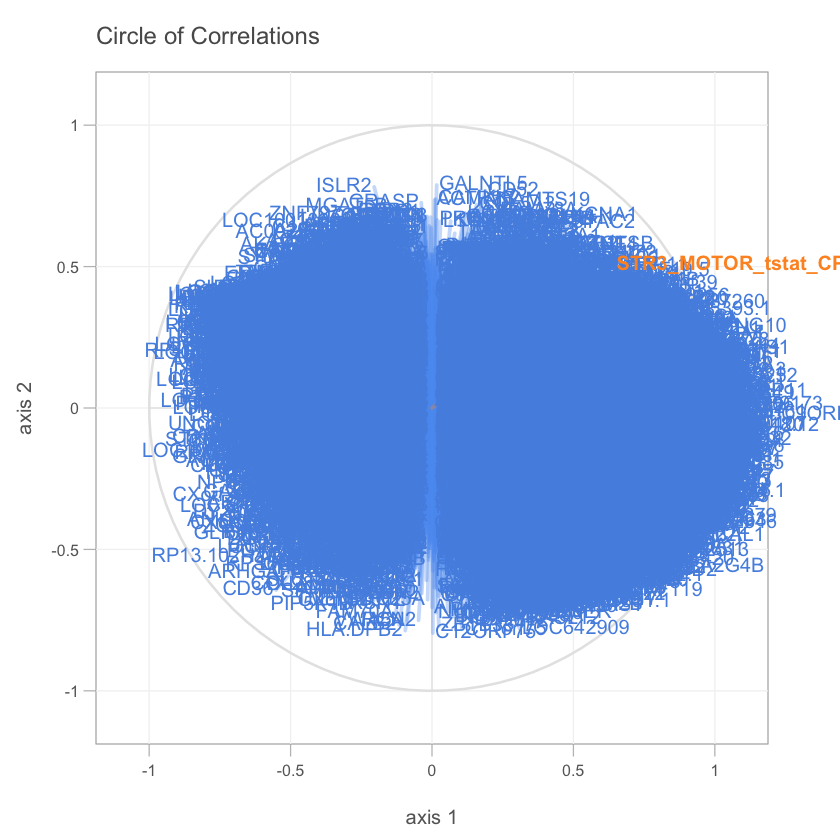

In [14]:
plot(plsx1)

In [89]:
plsx1.$x.scores 



PLS Regression 1
--------------------------------------------
$x.scores     X-scores (T-components)
$x.loads      X-loadings
$y.scores     Y-scores (U-components)
$y.loads      Y-loadings
$cor.xyt      score correlations
$raw.wgs      raw weights
$mod.wgs      modified weights
$std.coefs    standard coefficients
$reg.coefs    regular coefficients
$R2           R-squared
$R2Xy         explained variance of X-y by T
$y.pred       y-predicted
$resid        residuals
$T2           T2 hotelling
$Q2           Q2 cross validation
--------------------------------------------


In [123]:
x1 = plsx1$x.scores[,1]
y1 = chi[,1]
cor(x1,y1)

[1] 0.6449738

Warning message in xy.coords(x, y, recycle = TRUE, setLab = FALSE):
“NAs introduced by coercion”

[1] 0.6449738

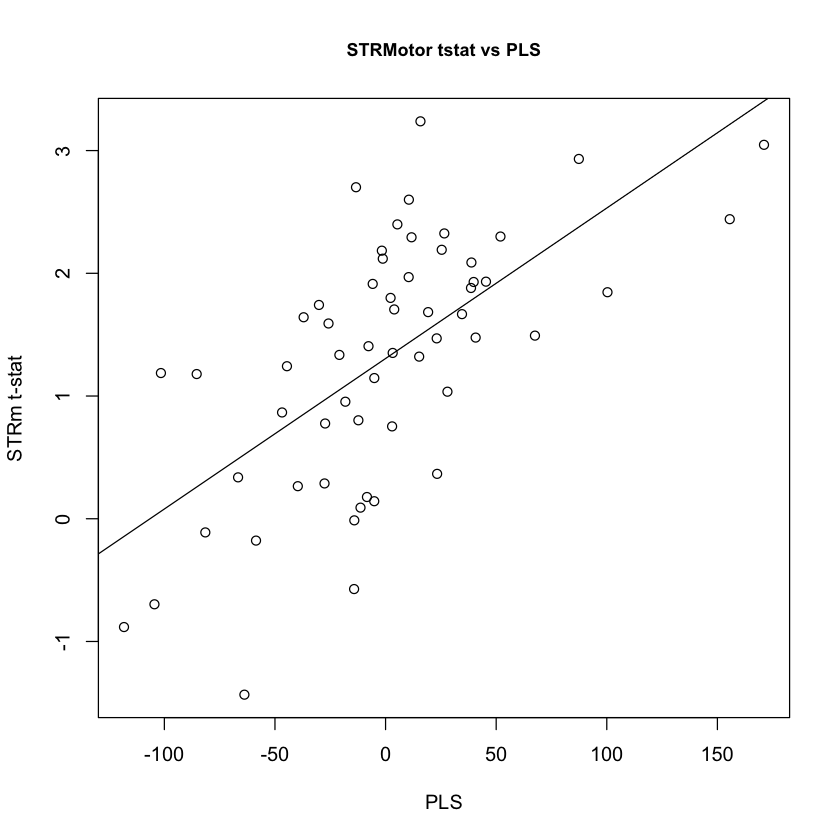

In [121]:
x1 = plsx1$x.scores[,1]
y1 = chi[,1]
plot(x1,y1, xlab='PLS', ylab = 'STRm t-stat')
title('STRMotor tstat vs PLS', cex.main = 0.9)
#abline(a = 0, b = 1, col = 'gray85', lwd = 2)
abline(lm(y1 ~ x1))
text('STR motor Case-Control t-stat', 'PLS1')
cor(x1,y1)

In [120]:
plsx1$raw.wgs[,1]

NULL

In [86]:
plsx1$x.loads

,p1,p2
X61E3.4,0.0097544972,0.0106517722
A1BG,0.0068228995,-0.0008080896
A1CF,-0.0048319102,0.0093693113
A26C1B,0.0055403585,0.0021099747
A2BP1,-0.0061322021,0.0183316292
A2LD1,0.0074952704,0.0030452618
A2M,0.0113555431,-0.0015809892
A2ML1,-0.0028573325,-0.0037038434
A3GALT2P,0.0113820417,-0.0101606865
A4GALT,0.0027642409,0.0081718942


In [65]:
plsx1$x.scores

,t1,t2
780,-46.789868,21.229016
788,-44.580034,26.675928
827,-85.388302,50.952296
933,-30.111844,26.685424
941,-20.879734,21.632660
949,-63.816698,-24.354910
977,-27.320097,10.834906
1028,-5.093024,32.103771
1170,-18.179082,26.375796
1171,-5.815829,22.629871
